In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
!pip install emoji
import emoji

!pip list
!pip install seaborn
!pip install scikit-learn
!pip install optuna


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Package                   Version
------------------------- --------------
alembic                   1.15.2
annotated-types           0.7.0
anyascii                  0.3.2
anyio                     4.9.0
appnope                   0.1.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
blis                      1.3.0
catalogue                 2.0.10
certifi                   2025.1.31
cffi                      1.17.1
charset-normalizer        3.4.1
click                     8.1.8
cloudpathlib              0.21.0
colorlog                  6.9.0
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.2
c

In [2]:
df=pd.read_csv('scitweets_balanced.tsv', sep='\t')
display (df.head())

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0.0,3.166700e+17,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1.0,3.190909e+17,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2.0,3.220309e+17,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3.0,3.226948e+17,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4.0,3.285244e+17,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


In [16]:
#----------------------------------------------
#-------explorations des données---------------
#----------------------------------------------

In [3]:
print("Taille du DataFrame :", df.shape) # nb de lignes et colonnes

print("\nSix premières lignes :\n")
display(df.head(6))

print("\nTrois dernières lignes :\n")
display(df.tail(3))

print("\nCinq lignes au hasard :\n")
display(df.sample(5))

Taille du DataFrame : (1530, 7)

Six premières lignes :



,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0.0,3.166700e+17,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1.0,3.190909e+17,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2.0,3.220309e+17,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3.0,3.226948e+17,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4.0,3.285244e+17,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0
5,6.0,3.313962e+17,The Impact of Infertility on You and Your Rela...,0,0.0,0.0,0.0



Trois dernières lignes :



,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
1527,NaN,NaN,Priority for future research on impact of Covi...,1,NaN,NaN,NaN
1528,NaN,NaN,Reading facebook comments for 20 minutes is sc...,1,NaN,NaN,NaN
1529,NaN,NaN,Volume Caps Pills Male Sex Enhancement Increas...,1,NaN,NaN,NaN



Cinq lignes au hasard :



,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
1473,NaN,NaN,Fasting or fasting-mimicking diets (FMDs) lead...,1,NaN,NaN,NaN
774,854.0,1.035198e+18,How the Brain and Personality Provide Protecti...,1,1.0,1.0,1.0
1324,NaN,NaN,"Do you load up on that drinks"" to stay hydrate...",1,NaN,NaN,NaN
1066,1176.0,1.283009e+18,There are more with us than with them—because ...,0,0.0,0.0,0.0
180,197.0,5.189266e+17,Bali Women's One Smooth U Side Support Underwi...,0,0.0,0.0,0.0


In [4]:
nb_SC = df[df["science_related"] == 1]["science_related"].count()
nb_non_SC = df[df["science_related"] == 0]["science_related"].count()

display(f"Nombre de tweets scientifiques : {nb_SC} ")
display(f"Nombre de tweets non scientifiques : {nb_non_SC}")

sc_bool = df[df["science_related"] == 1]

nb_claim = sc_bool[sc_bool["scientific_claim"] == 1.0]["tweet_id"].count()
nb_ref = sc_bool[sc_bool["scientific_reference"] == 1.0]["tweet_id"].count()
nb_context = sc_bool[sc_bool["scientific_context"] == 1.0]["tweet_id"].count()

nb_claim_ref = sc_bool[(sc_bool["scientific_claim"] == 1.0) & (sc_bool["scientific_reference"] == 1.0)]["tweet_id"].count()
nb_claim_context = sc_bool[(sc_bool["scientific_claim"] == 1.0) & (sc_bool["scientific_context"] == 1.0)]["tweet_id"].count()
nb_context_ref = sc_bool[(sc_bool["scientific_context"] == 1.0) & (sc_bool["scientific_reference"] == 1.0)]["tweet_id"].count()

nb_total = sc_bool[(sc_bool["scientific_claim"] == 1.0) |
                   (sc_bool["scientific_reference"] == 1.0) |
                   (sc_bool["scientific_context"] == 1.0)]["tweet_id"].count()


print(f"Nombre de tweets CLAIM : {nb_claim}")
print(f"Nombre de tweets REFERENCE : {nb_ref}")
print(f"Nombre de tweets CONTEXT : {nb_context}")
print(f"Nombre de tweets CLAIM & REF : {nb_claim_ref}")
print(f"Nombre de tweets CLAIM & CONTEXT : {nb_claim_context}")
print(f"Nombre de tweets CONTEXT & REF : {nb_context_ref}")
print(f"Nombre total de tweets ayant au moins une catégorie : {nb_total}")




'Nombre de tweets scientifiques : 765 '

'Nombre de tweets non scientifiques : 765'

Nombre de tweets CLAIM : 263
Nombre de tweets REFERENCE : 203
Nombre de tweets CONTEXT : 251
Nombre de tweets CLAIM & REF : 124
Nombre de tweets CLAIM & CONTEXT : 139
Nombre de tweets CONTEXT & REF : 203
Nombre total de tweets ayant au moins une catégorie : 375


In [5]:
import re
import emoji

def convert_emojis(text):
    return emoji.demojize(text)  # Convertit 😊 en :smiling_face_with_smiling_eyes:

df['text'] = df['text'].apply(convert_emojis)

# Détection d’URL "normaux"
df['has_url'] = df['text'].str.contains(r'http[s]?://', regex=True)

# Détection d’URL "réponse à des tweets"
#df['has_url_tweet'] = df['text'].str.contains(r'http[s]?://t.co/', regex=True)

# Détection de mentions (@username)
df['has_mention'] = df['text'].str.contains(r'@\w+', regex=True)

# Détection de hashtags (#mot)
df['has_hashtag'] = df['text'].str.contains(r'#\w+', regex=True)

# détection emojis
df['has_emoji'] = df['text'].str.contains(r':[^:\s]+:')

# Fonction d’agrégation
def count_by_category(col):
    return df.groupby('science_related')[col].sum()

print("- Tweets avec URL :")
display(count_by_category('has_url'))

print("- Tweets avec Mention :")
display(count_by_category('has_mention'))

print("- Tweets avec Hashtag :")
display(count_by_category('has_hashtag'))

print("- Tweets avec Emoji :")
display(df.groupby('science_related')['has_emoji'].sum())



- Tweets avec URL :


science_related
0    429
1    602
Name: has_url, dtype: int64

- Tweets avec Mention :


science_related
0    285
1    195
Name: has_mention, dtype: int64

- Tweets avec Hashtag :


science_related
0    249
1    349
Name: has_hashtag, dtype: int64

- Tweets avec Emoji :


science_related
0    81
1    13
Name: has_emoji, dtype: int64

In [9]:
#------------------------------------------------------------
#--------matrice tf-idf avce les données brut---------------
#-------------------------------------------------------------

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse

# ✅ Étape 1 : Nettoyage minimal (juste éviter les NaN)
df.dropna(subset=['text'], inplace=True)

# ✅ Étape 2 : Sélection du texte brut (pas de nettoyage ici)
X_text = df['text']  # Texte brut, pas 'text_clean'
y = df['science_related']  # Labels binaires

# ✅ Étape 3 : Création de la matrice TF-IDF à partir du texte brut
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X_text)

# ✅ Étape 4 : Création de la matrice des features binaires
# Convertir les booléens en int (0 ou 1) si ce n'est pas déjà fait
extra_features = df[['has_url', 'has_mention', 'has_hashtag', 'has_emoji']].astype(int)
X_extra = scipy.sparse.csr_matrix(extra_features.values)

# ✅ Étape 5 : Concaténer TF-IDF + features supplémentaires
X_final = scipy.sparse.hstack([X_tfidf, X_extra])

# ✅ Étape 6 : Affichage
print("📐 Taille de la matrice TF-IDF :", X_tfidf.shape)
print("📐 Taille des features supplémentaires :", X_extra.shape)
print("📐 Taille finale (TF-IDF + extra features) :", X_final.shape)


📐 Taille de la matrice TF-IDF : (1530, 8059)
📐 Taille des features supplémentaires : (1530, 4)
📐 Taille finale (TF-IDF + extra features) : (1530, 8063)


In [7]:
import re
import pandas as pd

# Convertir la matrice TF-IDF en DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Fonction de catégorisation
def get_token_category(token):
    if token.isdigit():
        return 'numeric'
    if re.match(r'^\d+(am|pm|s|h|min|sec|hour|years)?$', token.lower()):
        return 'timestamp'
    if re.match(r'^[a-zA-Z]+$', token):
        return 'valid'
    return 'other'

# Classer chaque token
token_categories = {token: get_token_category(token) for token in tfidf_df.columns}

# Regrouper par type
valid_tokens = [token for token, cat in token_categories.items() if cat == 'valid']
numeric_tokens = [token for token, cat in token_categories.items() if cat == 'numeric']
timestamp_tokens = [token for token, cat in token_categories.items() if cat == 'timestamp']

# Colonnes agrégées
tfidf_df['numeric'] = tfidf_df[numeric_tokens].sum(axis=1) if numeric_tokens else 0
tfidf_df['timestamp'] = tfidf_df[timestamp_tokens].sum(axis=1) if timestamp_tokens else 0

# Garder uniquement les tokens valides + colonnes synthétiques
tfidf_cleaned = tfidf_df[valid_tokens + ['numeric', 'timestamp']]

# Aperçu
print("📄 Aperçu de la matrice TF-IDF (texte brut)")
display(tfidf_cleaned.head())
print("📐 Taille finale :", tfidf_cleaned.shape)


📄 Aperçu de la matrice TF-IDF (texte brut)


,aamiin,aap,ab,abah,abbotslangley,abc,abcnetwork,abcnews,abdi,abeg,...,zika,zimmerman,zjghyzrngd,zmgaadmoei,zmrbajxmnu,zodiacareus,zomato,zoo,numeric,timestamp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


📐 Taille finale : (1530, 6783)


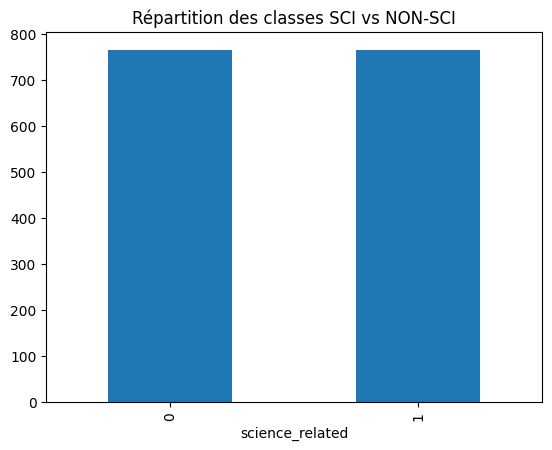

In [8]:
df['science_related'].value_counts().plot(kind='bar', title="Répartition des classes SCI vs NON-SCI")
plt.show()

In [9]:
# (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=df['science_related'])
#print(X_test)

print(f"Taille du jeu d'entraînement : {X_train.shape[0]} échantillons")
print(f"Taille du jeu de test : {X_test.shape[0]} échantillons")

Taille du jeu d'entraînement : 1224 échantillons
Taille du jeu de test : 306 échantillons



🔍 Entraînement du modèle : Naïve Bayes

📊 Scores Test : Naïve Bayes
Accuracy : 0.81 | Precision : 0.85 | Recall : 0.81 | F1 : 0.81
📄 Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.66      0.78       153
           1       0.74      0.97      0.84       153

    accuracy                           0.81       306
   macro avg       0.85      0.81      0.81       306
weighted avg       0.85      0.81      0.81       306

🧩 Matrice de confusion :
[[101  52]
 [  5 148]]


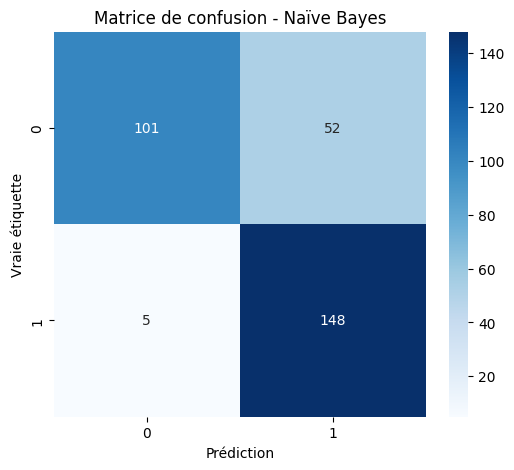

--------------------------------------------------

🔍 Entraînement du modèle : Random Forest

📊 Scores Test : Random Forest
Accuracy : 0.90 | Precision : 0.90 | Recall : 0.90 | F1 : 0.90
📄 Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       153
           1       0.93      0.86      0.89       153

    accuracy                           0.90       306
   macro avg       0.90      0.90      0.90       306
weighted avg       0.90      0.90      0.90       306

🧩 Matrice de confusion :
[[143  10]
 [ 22 131]]


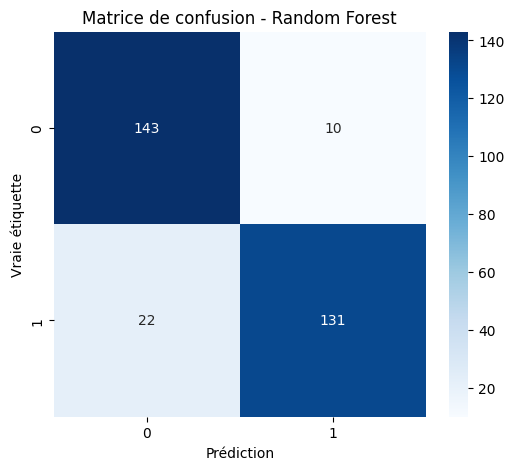

--------------------------------------------------

🔍 Entraînement du modèle : SVM sans params

📊 Scores Test : SVM sans params
Accuracy : 0.88 | Precision : 0.88 | Recall : 0.88 | F1 : 0.88
📄 Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       153
           1       0.90      0.85      0.88       153

    accuracy                           0.88       306
   macro avg       0.88      0.88      0.88       306
weighted avg       0.88      0.88      0.88       306

🧩 Matrice de confusion :
[[139  14]
 [ 23 130]]


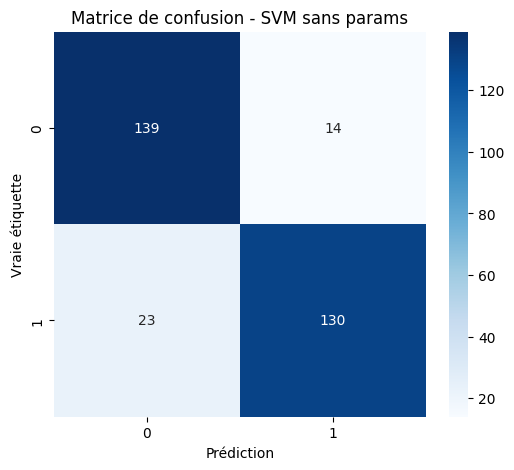

--------------------------------------------------

🔍 Entraînement du modèle : KNN sans params

📊 Scores Test : KNN sans params
Accuracy : 0.79 | Precision : 0.80 | Recall : 0.79 | F1 : 0.79
📄 Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.71      0.77       153
           1       0.75      0.88      0.81       153

    accuracy                           0.79       306
   macro avg       0.80      0.79      0.79       306
weighted avg       0.80      0.79      0.79       306

🧩 Matrice de confusion :
[[108  45]
 [ 18 135]]


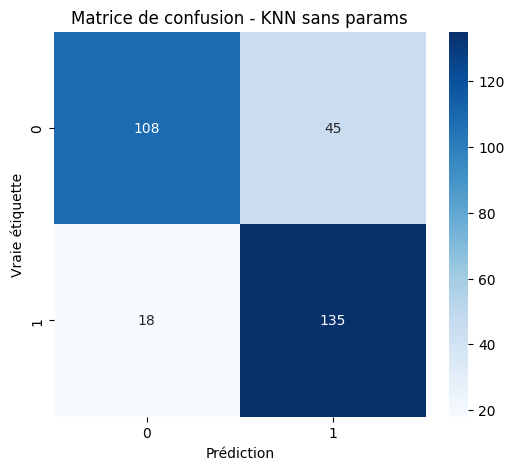

--------------------------------------------------

🔍 Entraînement du modèle : AdaBoost

📊 Scores Test : AdaBoost
Accuracy : 0.77 | Precision : 0.78 | Recall : 0.77 | F1 : 0.77
📄 Classification Report :
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       153
           1       0.82      0.70      0.75       153

    accuracy                           0.77       306
   macro avg       0.78      0.77      0.77       306
weighted avg       0.78      0.77      0.77       306

🧩 Matrice de confusion :
[[129  24]
 [ 46 107]]


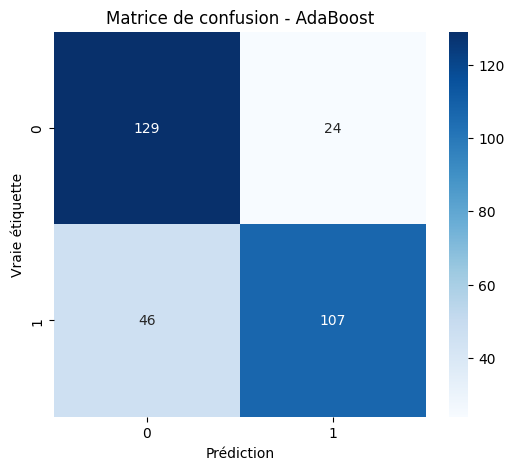

--------------------------------------------------

🔍 Entraînement du modèle : XGBoost sans params


/Users/salhinina/Desktop/mon_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:40:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/salhinina/Desktop/mon_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:40:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/salhinina/Desktop/mon_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:40:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/salhinina/Desktop/mon_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:40:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:


📊 Scores Test : XGBoost sans params
Accuracy : 0.87 | Precision : 0.87 | Recall : 0.87 | F1 : 0.87
📄 Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       153
           1       0.86      0.87      0.87       153

    accuracy                           0.87       306
   macro avg       0.87      0.87      0.87       306
weighted avg       0.87      0.87      0.87       306

🧩 Matrice de confusion :
[[132  21]
 [ 20 133]]


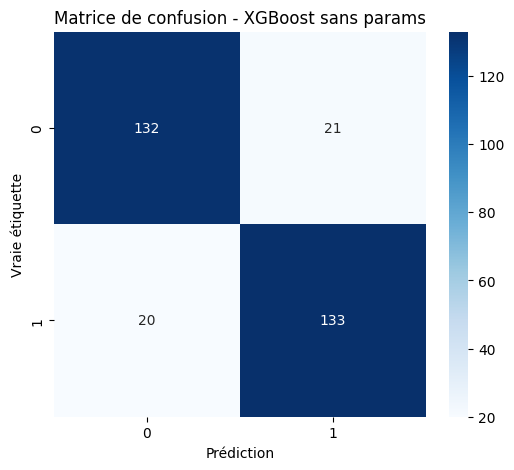

--------------------------------------------------

🔍 Entraînement du modèle : Neural Network - MLP

📊 Scores Test : Neural Network - MLP
Accuracy : 0.90 | Precision : 0.90 | Recall : 0.90 | F1 : 0.90
📄 Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       153
           1       0.90      0.90      0.90       153

    accuracy                           0.90       306
   macro avg       0.90      0.90      0.90       306
weighted avg       0.90      0.90      0.90       306

🧩 Matrice de confusion :
[[138  15]
 [ 15 138]]


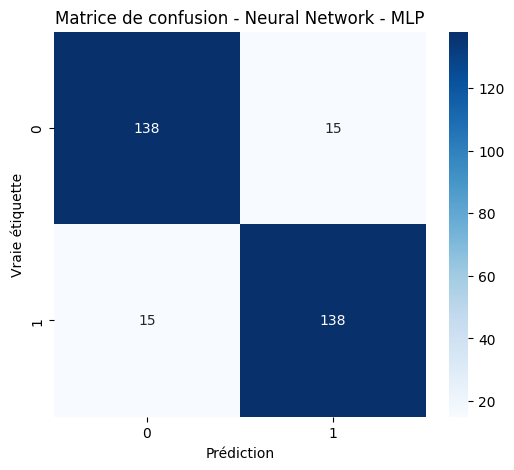

--------------------------------------------------


,Accuracy,Precision,Recall,F1 Score,CV Accuracy,CV Precision,CV Recall,CV F1 Score
Naïve Bayes,0.81,0.85,0.81,0.81,0.80 ± 0.01,0.83 ± 0.01,0.80 ± 0.01,0.79 ± 0.01
Random Forest,0.90,0.90,0.90,0.90,0.89 ± 0.01,0.90 ± 0.01,0.89 ± 0.02,0.89 ± 0.01
SVM sans params,0.88,0.88,0.88,0.88,0.86 ± 0.01,0.86 ± 0.01,0.86 ± 0.01,0.86 ± 0.01
KNN sans params,0.79,0.80,0.79,0.79,0.75 ± 0.01,0.77 ± 0.01,0.75 ± 0.01,0.74 ± 0.01
AdaBoost,0.77,0.78,0.77,0.77,0.76 ± 0.02,0.76 ± 0.02,0.76 ± 0.02,0.76 ± 0.02
XGBoost sans params,0.87,0.87,0.87,0.87,0.87 ± 0.03,0.87 ± 0.03,0.87 ± 0.03,0.87 ± 0.03
Neural Network - MLP,0.90,0.90,0.90,0.90,0.90 ± 0.03,0.90 ± 0.02,0.90 ± 0.02,0.90 ± 0.03


/var/folders/pf/x8z57h4121s6cmtp02twbdd00000gn/T/ipykernel_37144/308602618.py:104: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/salhinina/Desktop/mon_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


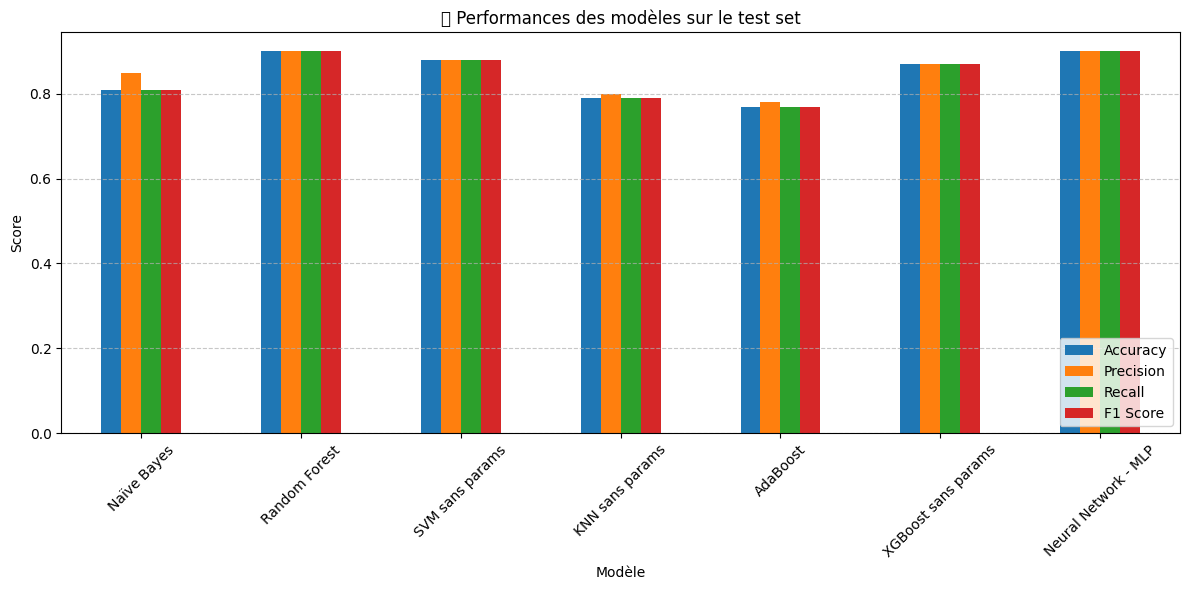

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold




# 6. Cross-validation stratifiée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 7. Modèles
scores = {}
models = {
    "Naïve Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "SVM sans params": SVC(),
    "KNN sans params": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost sans params": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Neural Network - MLP": MLPClassifier(max_iter=300),
}

# Scorers personnalisés
scorers = {
    "Accuracy": make_scorer(accuracy_score),
    "Precision": make_scorer(precision_score, average='weighted'),
    "Recall": make_scorer(recall_score, average='weighted'),
    "F1 Score": make_scorer(f1_score, average='weighted')
}

# 8. Entraînement + Évaluation + Cross-validation
for name, model in models.items():
    print(f"\n🔍 Entraînement du modèle : {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Cross-validation avec moyenne ± écart-type
    cv_results = {}
    for metric_name, scorer in scorers.items():
        cv_scores = cross_val_score(model, X_final, y, cv=cv, scoring=scorer)
        mean = cv_scores.mean()
        std = cv_scores.std()
        cv_results[metric_name] = f"{mean:.2f} ± {std:.2f}"

    scores[name] = {
        "Accuracy": f"{acc:.2f}",
        "Precision": f"{precision:.2f}",
        "Recall": f"{recall:.2f}",
        "F1 Score": f"{f1:.2f}",
        "CV Accuracy": cv_results["Accuracy"],
        "CV Precision": cv_results["Precision"],
        "CV Recall": cv_results["Recall"],
        "CV F1 Score": cv_results["F1 Score"]
    }

    print(f"\n📊 Scores Test : {name}")
    print(f"Accuracy : {acc:.2f} | Precision : {precision:.2f} | Recall : {recall:.2f} | F1 : {f1:.2f}")
    print("📄 Classification Report :")
    print(classification_report(y_test, y_pred))
    print("🧩 Matrice de confusion :")
    print(confusion_matrix(y_test, y_pred))

    # Matrice de confusion
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matrice de confusion - {name}')
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.show()
    print("-" * 50)

# 9. Visualisation globale des scores
df_scores = pd.DataFrame(scores).T

# Affichage de la table complète (avec les ± pour le rapport)
display(df_scores)

# ⚠️ Pour tracer, on extrait juste les scores test simples (pas les ±)
plot_df = df_scores[["Accuracy", "Precision", "Recall", "F1 Score"]].astype(float)

plot_df.plot(kind='bar', figsize=(12, 6))
plt.title("📊 Performances des modèles sur le test set")
plt.xlabel("Modèle")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()